# Online Stochastic Gradient Descent for Linear Regression (User Defined Function)

In [1]:
import numpy as np
import pandas as pd
## Incorporating online SGD


class Online_SGD:
    import warnings
    warnings.filterwarnings("ignore")


    def __init__(self,  weight, bias, learning_rate=0.2,damp_factor=1.02):
        self.learning_rate = learning_rate
        self.damp_factor = damp_factor
        self.w = weight
        self.b = bias

    def fit_online(self, X, Y):
        for i in range(X.shape[0]):
            x = (np.array(X))[i].reshape(1, X.shape[1])
            y = (np.array(Y))[i].reshape(1, 1)
            Lw = np.dot((y - np.dot(x, self.w.T) - self.b), x)
            Lb = (y - np.dot(x, self.w.T) - self.b)
            self.w = self.w + self.learning_rate * Lw
            self.b = self.b + self.learning_rate * Lb
            self.learning_rate = self.learning_rate / self.damp_factor

        return self.w, self.b

    def fit_regression(self, X, Y):
        from sklearn.linear_model import LinearRegression
        reg = LinearRegression()
        reg.fit(X, Y)
        self.w = reg.coef_.reshape(1, X.shape[1])
        self.b = reg.intercept_.reshape(1, 1)
        return self.w, self.b

    def predict(self, X):
        m = np.dot(X, self.w.T) + self.b
        n = m.reshape(-1, )

        return n


# Online Stochastic Gradient Descent for Quantile Linear Regression (User Defined Function)

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
## Incorporating online SGD


class Online_QuantileSGD:
    import warnings
    warnings.filterwarnings("ignore")


    def __init__(self,  weight, bias, tow , alpha, learning_rate=0.2,damp_factor=1.02):
        self.learning_rate = learning_rate
        self.damp_factor = damp_factor
        self.w = weight
        self.b = bias
        self.tow = tow
        self.alpha = alpha

    def fit_online(self, data):
        Y = data.iloc[:,-1]
        X = data.iloc[:,0:-1]

        for i in range(X.shape[0]):
            x = (np.array(X))[i].reshape(1, X.shape[1])
            y = (np.array(Y))[i].reshape(1, 1)
            bias = self.b.reshape(1,1)
            Lw = np.dot(self.tow - (1 / (1 + np.exp((y - np.dot(x, self.w.T) - bias)/self.alpha))), x)
            Lb = self.tow - (1 / (1 + np.exp((y - np.dot(x, self.w.T) - bias)/self.alpha)))
            self.w = self.w + self.learning_rate * Lw
            self.b = self.b + self.learning_rate * Lb
            self.learning_rate = self.learning_rate / self.damp_factor


        return self.w, self.b

    def fit_regression(self, data):
        formula=str(data.columns[-1])+' ~ '+" + ".join(data.columns[:-1])
        mod = smf.quantreg(formula,data)
        res = mod.fit(q=self.tow)
        self.b=res.params["Intercept"]
        self.w=np.array(list(res.params)[1:]).reshape(1,-1)

        return self.w, np.array(self.b)

    def predict(self, data):
        Y = data.iloc[:,-1]
        X = data.iloc[:,0:-1]

        # self.w = np.loadtxt(self.w_file).reshape(1, X.shape[1])  # Reading weights and bias
        # self.b = np.loadtxt(self.b_file).reshape(1, 1)
        m = np.dot(X, self.w.T) + self.b
        n = m.reshape(-1, )

        return n

# Comparison of Online Learning for Linear Regression

In [3]:
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math

# Importing the Data Set

In [4]:
rng = np.random.RandomState(42)
x = np.linspace(start=0, stop=10, num=100)
X = x[:, np.newaxis]
y_true_mean = 10 + 0.5 * x

In [5]:
y_normal = y_true_mean + rng.normal(loc=0, scale=0.5 + 0.5 * x, size=x.shape[0])
a = 5
y_pareto = y_true_mean + 10 * (rng.pareto(a, size=x.shape[0]) - 1 / (a - 1))

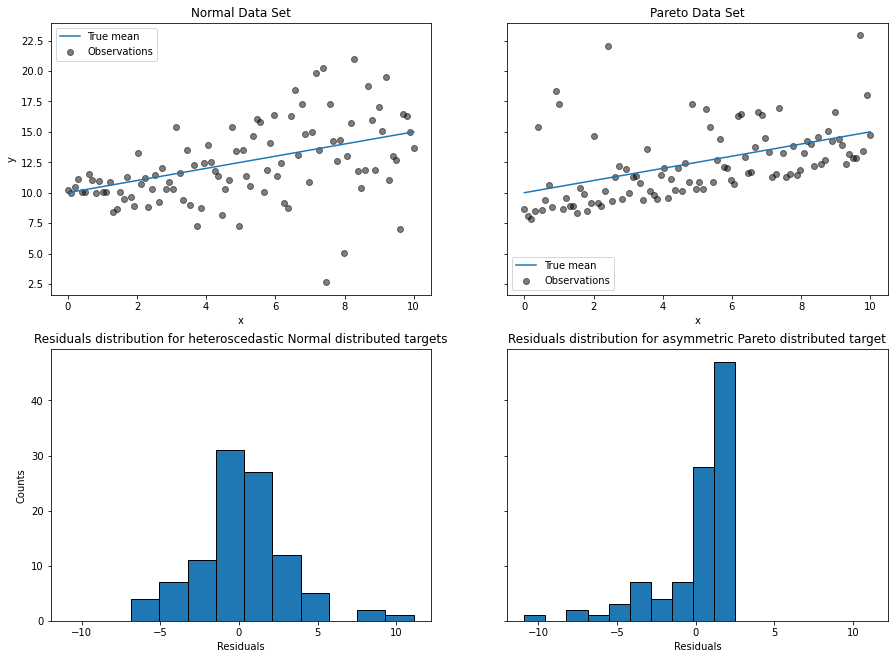

In [6]:
import matplotlib.pyplot as plt

_, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 11), sharex="row", sharey="row")

axs[0, 0].plot(x, y_true_mean, label="True mean")
axs[0, 0].scatter(x, y_normal, color="black", alpha=0.5, label="Observations")
axs[1, 0].hist(y_true_mean - y_normal, edgecolor="black")


axs[0, 1].plot(x, y_true_mean, label="True mean")
axs[0, 1].scatter(x, y_pareto, color="black", alpha=0.5, label="Observations")
axs[1, 1].hist(y_true_mean - y_pareto, edgecolor="black")

axs[0, 0].set_title("Normal Data Set")
axs[0, 1].set_title("Pareto Data Set")
axs[1, 0].set_title(
    "Residuals distribution for heteroscedastic Normal distributed targets"
)
axs[1, 1].set_title("Residuals distribution for asymmetric Pareto distributed target")
axs[0, 0].legend()
axs[0, 1].legend()
axs[0, 0].set_ylabel("y")
axs[1, 0].set_ylabel("Counts")
axs[0, 1].set_xlabel("x")
axs[0, 0].set_xlabel("x")
axs[1, 0].set_xlabel("Residuals")
_ = axs[1, 1].set_xlabel("Residuals")
plt.savefig('Data12.jpeg')

### Linear Regression on Normal Noise Data Set 

In [7]:
reg1_normal = LinearRegression().fit(X,y_normal)
score1_normal = reg1_normal.score(X, y_normal)
coef1_normal = reg1_normal.coef_
bias1_normal = reg1_normal.intercept_

In [8]:
y1_normal = bias1_normal + np.dot(coef1_normal,X.T)

In [9]:
mse1_normal = math.sqrt(mean_squared_error(y_normal, y1_normal))
mse1_normal

2.8961109407141383

### Linear Regression on Pareto Noise Data Set

In [10]:
reg1_pareto = LinearRegression().fit(X,y_pareto)
score1_pareto = reg1_pareto.score(X, y_pareto)
coef1_pareto = reg1_pareto.coef_
bias1_pareto = reg1_pareto.intercept_

In [11]:
y1_pareto = bias1_pareto + np.dot(coef1_pareto,X.T)

In [12]:
mse1_pareto = math.sqrt(mean_squared_error(y_pareto, y1_pareto))
mse1_pareto

2.5467564073472277

Text(0.5, 0, 'x')

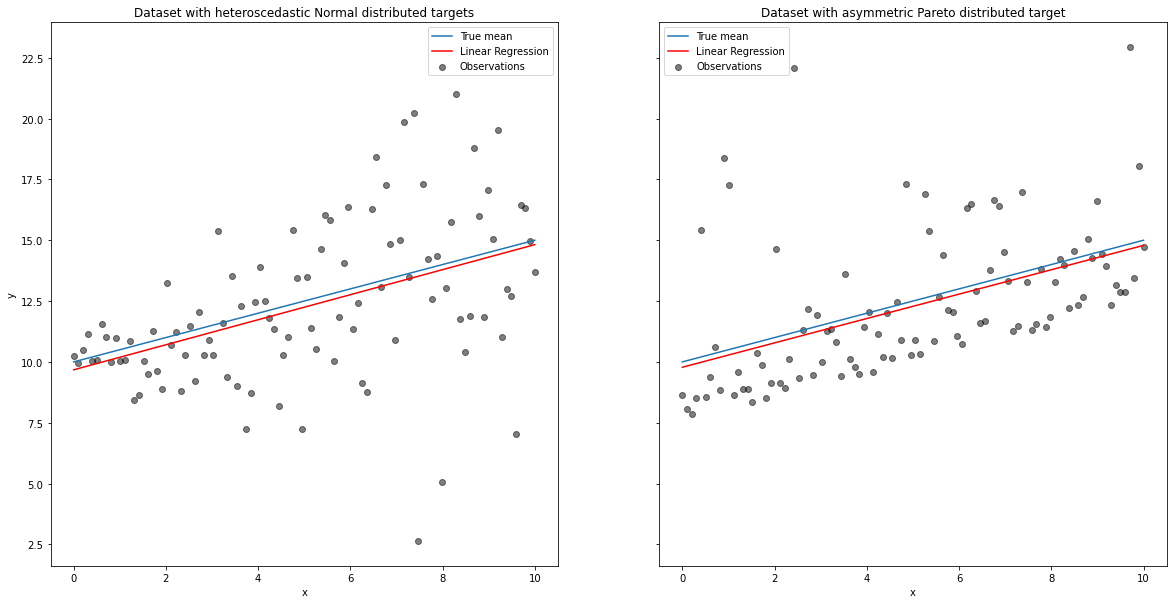

In [13]:
import matplotlib.pyplot as plt

fig1, axs1 = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharex="row", sharey="row")

axs1[0].plot(x, y_true_mean, label="True mean")
axs1[0].scatter(x, y_normal, color="black", alpha=0.5, label="Observations")
axs1[0].plot(x, y1_normal, color = "red",label="Linear Regression")


axs1[1].plot(x, y_true_mean, label="True mean")
axs1[1].scatter(x, y_pareto, color="black", alpha=0.5, label="Observations")
axs1[1].plot(x, y1_pareto, color = "red",label="Linear Regression")

axs1[0].set_title("Dataset with heteroscedastic Normal distributed targets")
axs1[1].set_title("Dataset with asymmetric Pareto distributed target")

axs1[0].legend()
axs1[1].legend()
axs1[0].set_ylabel("y")
axs1[1].set_xlabel("x")
axs1[0].set_xlabel("x")

# Online Linear Regression

In [14]:
def coeff_error(w):
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    return(sqrt(mean_squared_error(W,w)))
def bias_error(b):
    return(sqrt(mean_squared_error(B,b)))
def pred_error(x,y):
    return np.sum(np.abs(x-y) / y.shape[0])
def rmse(x,y):
    return(math.sqrt(np.mean((x-y)**2)))

In [15]:
wb = pd.DataFrame()    
wb['w'] = [np.zeros(X.shape[1],) for i in range(X.shape[1])]
wb['b'] = [np.zeros(1,) for i in range(X.shape[1])] 

### Online Linear Regression on Normal Noise Data Set

In [16]:
reg_2_normal = Online_SGD(wb['w'][0],wb['b'][0], learning_rate=0.00008,damp_factor=1)
weight, bias = reg_2_normal.fit_regression(X[0:51],y_normal[0:51])

In [17]:
reg_2_normal_online = Online_SGD(weight,bias, learning_rate=0.00008,damp_factor=1)
coef2_normal , bias2_normal = reg_2_normal_online.fit_online(X[51:],y_normal[51:])

In [18]:
y2_online_normal = bias2_normal + np.dot(coef2_normal,X.T)

In [19]:
mse2_online_normal = math.sqrt(mean_squared_error(y_normal, y2_online_normal[0]))
mse2_online_normal

2.985142370240991

### Online Linear Regression on Pareto Noise Data Set

In [20]:
reg_2_pareto = Online_SGD(wb['w'][0],wb['b'][0], learning_rate=0.00008,damp_factor=1)
weight, bias = reg_2_pareto.fit_regression(X[0:51],y_pareto[0:51])

In [21]:
reg_2_pareto_online = Online_SGD(weight,bias, learning_rate=0.00008,damp_factor=1)
coef2_pareto , bias2_pareto = reg_2_pareto_online.fit_online(X[51:],y_pareto[51:])

In [22]:
y2_online_pareto = bias2_pareto + np.dot(coef2_pareto,X.T)

In [23]:
mse2_online_pareto = math.sqrt(mean_squared_error(y_pareto, y2_online_pareto[0]))
mse2_online_pareto

2.62479836110596

Text(0.5, 0, 'x')

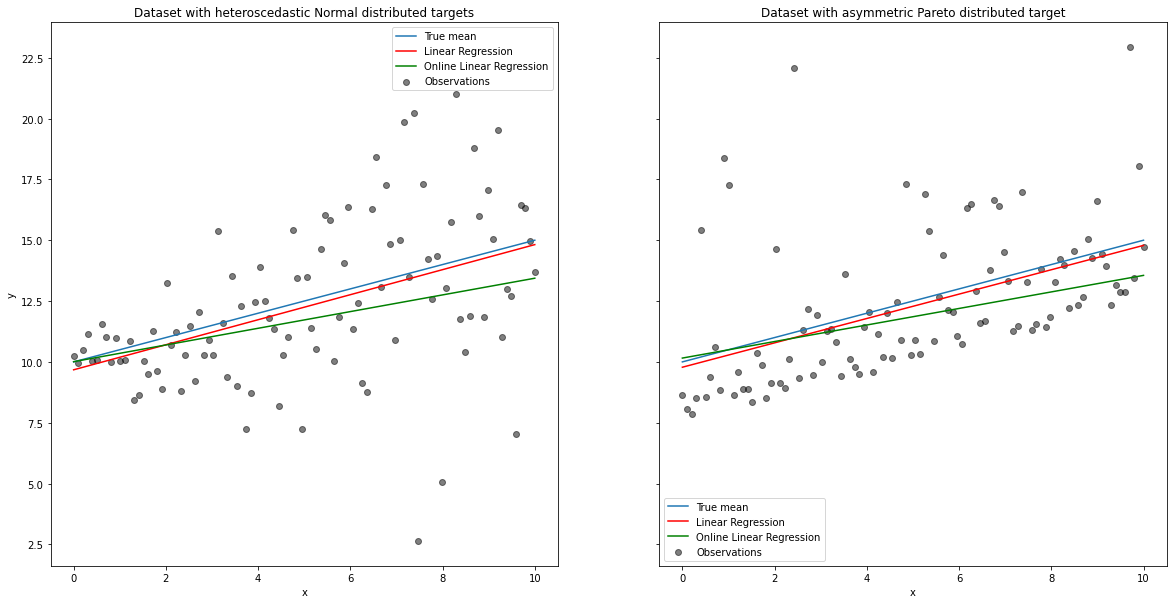

In [24]:
import matplotlib.pyplot as plt

fig1, axs1 = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharex="row", sharey="row")

axs1[0].plot(x, y_true_mean, label="True mean")
axs1[0].scatter(x, y_normal, color="black", alpha=0.5, label="Observations")
axs1[0].plot(x, y1_normal, color = "red",label="Linear Regression")
axs1[0].plot(x, y2_online_normal[0], color = "green",label="Online Linear Regression")


axs1[1].plot(x, y_true_mean, label="True mean")
axs1[1].scatter(x, y_pareto, color="black", alpha=0.5, label="Observations")
axs1[1].plot(x, y1_pareto, color = "red",label="Linear Regression")
axs1[1].plot(x, y2_online_pareto[0], color = "green",label="Online Linear Regression")

axs1[0].set_title("Dataset with heteroscedastic Normal distributed targets")
axs1[1].set_title("Dataset with asymmetric Pareto distributed target")

axs1[0].legend()
axs1[1].legend()
axs1[0].set_ylabel("y")
axs1[1].set_xlabel("x")
axs1[0].set_xlabel("x")

In [25]:
measure = pd.DataFrame(index = ('Linear Regression', 'Online Linear Regression'), columns = ('normal', 'pareto'))
normal = [mse1_normal, mse2_online_normal]
pareto = [mse1_pareto, mse2_online_pareto]
measure['normal'] = normal
measure['pareto'] = pareto
measure

,normal,pareto
Linear Regression,2.896111,2.546756
Online Linear Regression,2.985142,2.624798


### Linear Regression for mtcars dataset

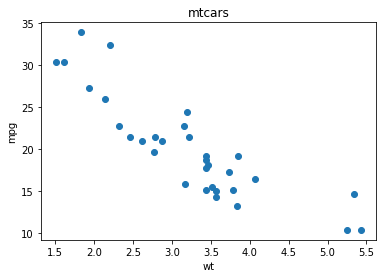

In [26]:
import statsmodels.api as sm
mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)
y = df['mpg'].values.reshape(-1,1)
X = df['wt'].values.reshape(-1,1)
plt.scatter(X,y)
plt.xlabel('wt')
plt.ylabel('mpg')
plt.title('mtcars')
plt.show()

In [27]:
reg1_mtcars = LinearRegression().fit(X,y)
score1_mtcars = reg1_mtcars.score(X, y)
coef1_mtcars = reg1_mtcars.coef_
bias1_mtcars = reg1_mtcars.intercept_


In [28]:
y1_mtcars = bias1_mtcars + np.dot(coef1_mtcars,X.T)

In [29]:
mse1_mtcars = math.sqrt(mean_squared_error(y, y1_mtcars[0]))
mse1_mtcars

2.949162685955028

In [30]:
from scipy.stats import skew
skew(y)

array([0.64043986])

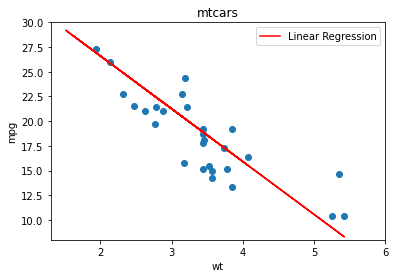

In [31]:
plt.scatter(X,y)
plt.plot(X,y1_mtcars[0], color = 'red', label = 'Linear Regression')
plt.xlabel('wt')
plt.ylabel('mpg')
plt.title('mtcars')
plt.ylim(8,30)
plt.xlim(1.3,6)
plt.legend()
plt.savefig('Data3.jpeg')

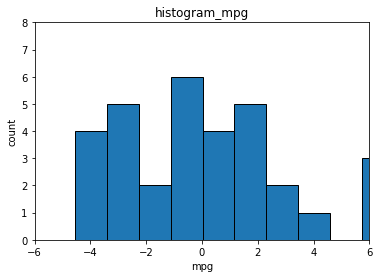

In [32]:
plt.hist(y.reshape(1,32)[0]-y1_mtcars[0],bins = 10, edgecolor="black")
plt.xlabel('mpg')
plt.ylabel('count')
plt.ylim(0,8)
plt.xlim(-6,6)
plt.title('histogram_mpg')
plt.savefig('hist3.jpeg')

### Online Linear Regression for mtcars Data Set

In [33]:
reg_2_mtcars = Online_SGD(wb['w'][0],wb['b'][0], learning_rate=0.00008,damp_factor=1)
weight, bias = reg_2_mtcars.fit_regression(X[0:11],y[0:11])

In [34]:
reg_2_mtcars_online = Online_SGD(weight,bias, learning_rate=0.00008,damp_factor=1)
coef2_mtcars , bias2_mtcars = reg_2_mtcars_online.fit_online(X[11:],y[11:])

In [35]:
y2_online_mtcars = bias2_mtcars + np.dot(coef2_mtcars,X.T)

In [36]:
mse2_online_mtcars = math.sqrt(mean_squared_error(y, y2_online_mtcars[0]))
mse2_online_mtcars

3.065905293729637

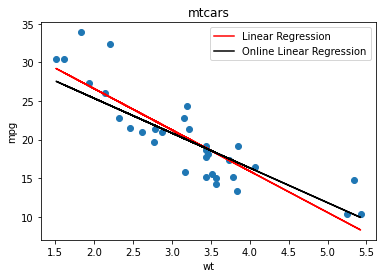

In [37]:
plt.scatter(X,y)
plt.plot(X,y1_mtcars[0], color = 'red', label = 'Linear Regression')
plt.plot(X,y2_online_mtcars[0], color = 'black', label = 'Online Linear Regression')
plt.xlabel('wt')
plt.ylabel('mpg')
plt.title('mtcars')
plt.legend()
plt.savefig('mtcars.jpeg')
plt.show()


### Linear Regression for Old Faithful Geyser Data Set

In [38]:
df = pd.read_csv('faithful.csv',index_col=False)
df.drop(['Unnamed: 0'], axis = 1)

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


In [39]:
X = df['eruptions'].values.reshape(-1,1)
y = df['waiting'].values.reshape(-1,1)

In [40]:
reg1_faithful = LinearRegression().fit(X,y)
score1_faithful = reg1_faithful.score(X, y)
coef1_faithful = reg1_faithful.coef_
bias1_faithful = reg1_faithful.intercept_

In [41]:
y1_faithful = bias1_faithful + np.dot(coef1_faithful,X.T)

In [42]:
mse1_faithful = math.sqrt(mean_squared_error(y, y1_faithful[0]))
mse1_faithful

5.892226635893954

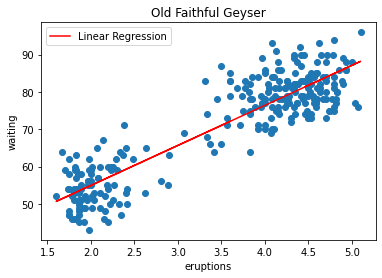

In [43]:
plt.scatter(X,y)
plt.plot(X,y1_faithful[0], color = 'red', label = 'Linear Regression')
plt.xlabel('eruptions')
plt.ylabel('waiting')
plt.title('Old Faithful Geyser')
plt.legend()
plt.savefig('Data4.jpeg')

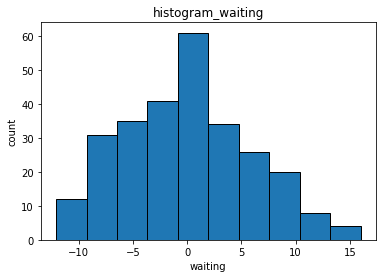

In [44]:
plt.hist(y.reshape(1,272)[0]-y1_faithful[0],bins = 10, edgecolor="black")
plt.xlabel('waiting')
plt.ylabel('count')
plt.title('histogram_waiting')
plt.savefig('hist4.jpeg')

### Online Linear Regression for Old Faithful Geyder Data Set 

In [45]:
reg_2_faithful = Online_SGD(wb['w'][0],wb['b'][0], learning_rate=0.00008,damp_factor=1)
weight, bias = reg_2_faithful.fit_regression(X[0:101],y[0:101])

In [46]:
reg_2_faithful_online = Online_SGD(weight,bias, learning_rate=0.00008,damp_factor=1)
coef2_faithful , bias2_faithful = reg_2_faithful_online.fit_online(X[101:],y[101:])

In [47]:
y2_online_faithful = bias2_faithful + np.dot(coef2_faithful,X.T)

In [48]:
mse2_online_faithful = math.sqrt(mean_squared_error(y, y2_online_faithful[0]))
mse2_online_faithful

6.05694445637769

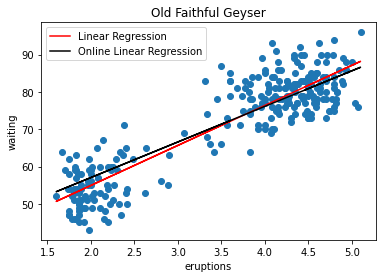

In [49]:
plt.scatter(X,y)
plt.plot(X,y1_faithful[0], color = 'red', label = 'Linear Regression')
plt.plot(X,y2_online_faithful[0], color = 'black', label = 'Online Linear Regression')
plt.xlabel('eruptions')
plt.ylabel('waiting')
plt.title('Old Faithful Geyser')
plt.legend()
plt.savefig('faithful.jpeg')

In [50]:
coef_df = pd.DataFrame(index =('Normal noise', 'Pareto Noise', 'mtcars', 'faithful'),columns = ('Weight','Weight_Online','Bias','Bias_Online'))
coef_df['Weight'] = [coef1_normal[0],coef1_pareto[0], coef1_mtcars[0][0], coef1_faithful[0][0]]
coef_df['Bias'] = [bias1_normal,bias1_pareto, bias1_mtcars[0], bias1_faithful[0]]
coef_df['Weight_Online'] = [coef2_normal[0][0],coef2_pareto[0][0], coef2_mtcars[0][0], coef2_faithful[0][0]]
coef_df['Bias_Online'] = [bias2_normal[0][0],bias2_pareto[0][0], bias2_mtcars[0][0], bias2_faithful[0][0]]


In [51]:
coef_df

,Weight,Weight_Online,Bias,Bias_Online
Normal noise,0.514377,0.342886,9.675209,10.009603
Pareto Noise,0.500700,0.339790,9.780902,10.157114
mtcars,-5.344472,-4.507312,37.285126,34.363265
faithful,10.729641,9.535176,33.474397,37.981623


In [52]:
mse_df = pd.DataFrame(index = ('Normal noise', 'Pareto Noise', 'mtcars', 'faithful'),columns = ('MSE','MSE_Online'))

In [53]:
mse_df['MSE'] = [mse1_normal, mse1_pareto, mse1_mtcars, mse1_faithful]
mse_df['MSE_Online'] = [mse2_online_normal, mse2_online_pareto, mse2_online_mtcars, mse2_online_faithful]

In [54]:
mse_df

,MSE,MSE_Online
Normal noise,2.896111,2.985142
Pareto Noise,2.546756,2.624798
mtcars,2.949163,3.065905
faithful,5.892227,6.056944


# Comparison of Online Learning of Quantile Linear Regression

In [55]:
rng = np.random.RandomState(42)
x = np.linspace(start=0, stop=10, num=100)
X = x[:, np.newaxis]
y_true_mean = 10 + 0.5 * x

In [56]:
y_normal = y_true_mean + rng.normal(loc=0, scale=0.5 + 0.5 * x, size=x.shape[0])
a = 5
y_pareto = y_true_mean + 10 * (rng.pareto(a, size=x.shape[0]) - 1 / (a - 1))

In [57]:
normal = pd.DataFrame(columns = ('x','y'))
normal['x'] = x
normal['y'] = y_normal
pareto = pd.DataFrame(columns = ('x','y'))
pareto['x'] = x
pareto['y'] = y_pareto

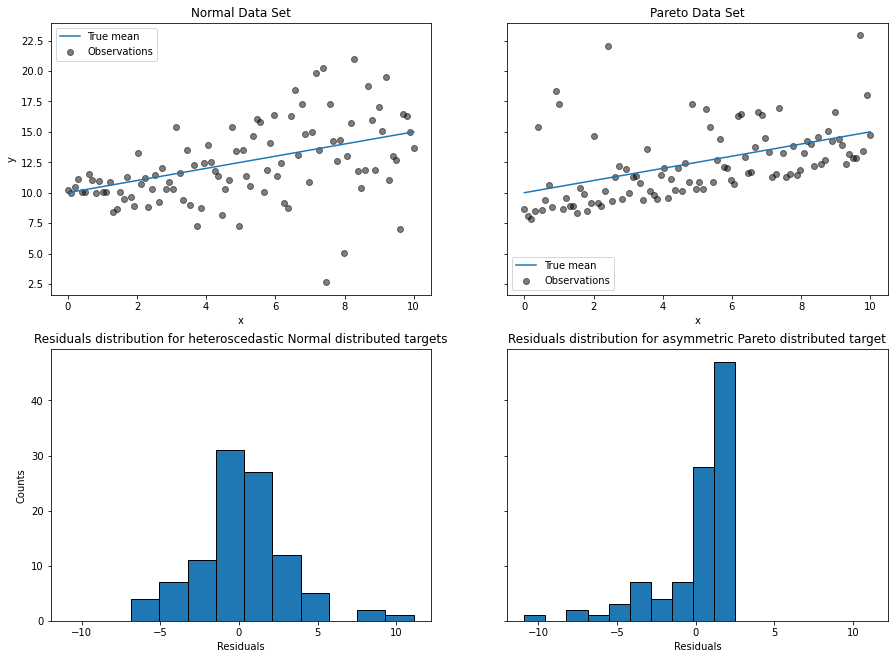

In [58]:
import matplotlib.pyplot as plt

_, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 11), sharex="row", sharey="row")

axs[0, 0].plot(x, y_true_mean, label="True mean")
axs[0, 0].scatter(x, y_normal, color="black", alpha=0.5, label="Observations")
axs[1, 0].hist(y_true_mean - y_normal, edgecolor="black")


axs[0, 1].plot(x, y_true_mean, label="True mean")
axs[0, 1].scatter(x, y_pareto, color="black", alpha=0.5, label="Observations")
axs[1, 1].hist(y_true_mean - y_pareto, edgecolor="black")

axs[0, 0].set_title("Normal Data Set")
axs[0, 1].set_title("Pareto Data Set")
axs[1, 0].set_title(
    "Residuals distribution for heteroscedastic Normal distributed targets"
)
axs[1, 1].set_title("Residuals distribution for asymmetric Pareto distributed target")
axs[0, 0].legend()
axs[0, 1].legend()
axs[0, 0].set_ylabel("y")
axs[1, 0].set_ylabel("Counts")
axs[0, 1].set_xlabel("x")
axs[0, 0].set_xlabel("x")
axs[1, 0].set_xlabel("Residuals")
_ = axs[1, 1].set_xlabel("Residuals")
plt.savefig('Data12.jpeg')

### Quantile Regression for Normal Data

In [59]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [60]:
mod1_normal = smf.quantreg('y ~ x',normal)
res = mod1_normal.fit(q=0.5)
for i in res.params.index:
    print(res.params[i])

9.821716160387833
0.504137966150707


In [61]:
quant = np.arange(0.1, 0.96, 0.1)
quantile = np.append(0.05,quant)
quantiles = np.append(quantile,0.95)

def fit_model_normal(q):
    res = mod1_normal.fit(q=q)
    return [q, res.params["Intercept"], res.params["x"]] 


models = [fit_model_normal(x) for x in quantiles]
models = pd.DataFrame(models, columns=["q", "a", "b"])

models

,q,a,b
0,0.05,9.182897,-0.394532
1,0.10,8.803792,-0.004115
2,0.20,9.051236,0.267287
3,0.30,9.574339,0.291115
4,0.40,9.676854,0.374668
5,0.50,9.821716,0.504138
6,0.60,9.910968,0.627872
7,0.70,10.248351,0.654820
8,0.80,10.248358,0.930664
9,0.90,10.856092,0.949410


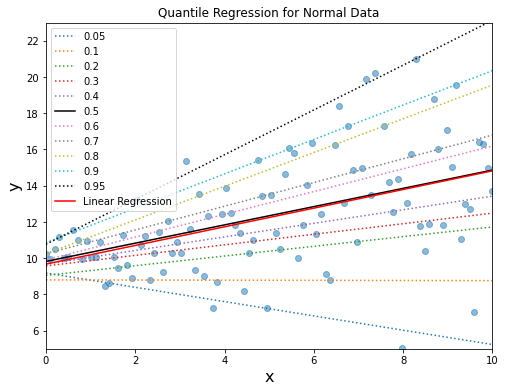

In [62]:
x = np.linspace(start=0, stop=10, num=100)
mae = []
mse = []
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))
col = ['tab:blue', 'tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:grey','tab:olive','tab:cyan','black']

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    mae.append(mean_absolute_error(y,y_normal))
    mse.append(mean_squared_error(y,y_normal))
    if models['q'][i] == 0.5:
        ax.plot(x, y, color='black', alpha = 1, label = 0.5)
    else:
        ax.plot(x, y, linestyle="dotted", color=col[i], alpha = 1, label = '{quantile}'.format(quantile = round(models['q'][i],2)))

ax.plot(x, y1_normal, color="red", label="Linear Regression")
ax.scatter(normal.x, normal.y, alpha=0.5)
ax.set_xlim((0, 10))
ax.set_ylim((5, 23))
legend = ax.legend()
ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y", fontsize=16)
ax.set_title("Quantile Regression for Normal Data")
loss_df_normal = pd.DataFrame(columns= ('Quantile','MAE','MSE'))
loss_df_normal['Quantile'] = models['q']
loss_df_normal['MAE'] = mae
loss_df_normal['MSE'] =mse

In [63]:
loss_df_normal

,Quantile,MAE,MSE
0,0.05,5.142231,40.780760
1,0.10,3.781359,22.671435
2,0.20,2.647569,12.363957
3,0.30,2.329236,10.292757
4,0.40,2.163666,9.039065
5,0.50,2.092697,8.397434
6,0.60,2.171494,9.142158
7,0.70,2.304180,10.181682
8,0.80,3.064768,16.907584
9,0.90,3.564262,21.259482


### Online Quantile Regression for Normal Data

In [64]:
def fit_model_online_normal(q):
    mod2_normal = Online_QuantileSGD(wb['w'][0],wb['b'][0], tow = q, alpha = 0.001,learning_rate=0.00008,damp_factor=1)
    weight, bias = mod2_normal.fit_regression(normal[:71])
    mod2_online_normal = Online_QuantileSGD(weight, bias, tow= q,alpha = 0.001,learning_rate = 0.0001, damp_factor = 1)
    w,b = mod2_online_normal.fit_online(normal[71:])
    return [q, b[0][0],w[0][0]]
models = [fit_model_online_normal(x) for x in quantiles]
models = pd.DataFrame(models, columns=["q", "a", "b"])

In [65]:
models

,q,a,b
0,0.05,8.546921,-0.079947
1,0.10,8.803782,-0.004130
2,0.20,9.262631,0.138225
3,0.30,9.832591,0.158419
4,0.40,9.676919,0.375087
5,0.50,9.841111,0.467141
6,0.60,9.754289,0.698114
7,0.70,10.021099,0.701503
8,0.80,10.248377,0.930534
9,0.90,10.856100,0.949204


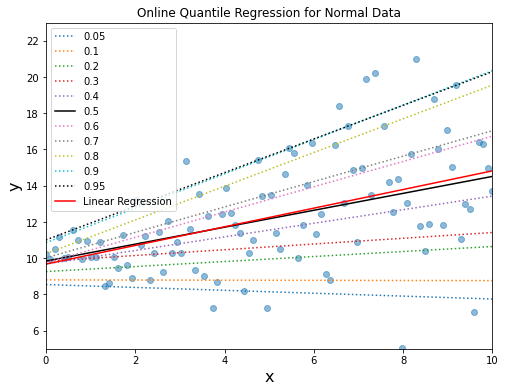

In [66]:
x = np.linspace(start=0, stop=10, num=100)
mae = []
mse = []
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))
col = ['tab:blue', 'tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:grey','tab:olive','tab:cyan','black']

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    mae.append(mean_absolute_error(y,y_normal))
    mse.append(mean_squared_error(y,y_normal))
    if models['q'][i] == 0.5:
        ax.plot(x, y, color='black', alpha = 1, label = 0.5)
    else:
        ax.plot(x, y, linestyle="dotted", color=col[i], alpha = 1, label = '{quantile}'.format(quantile = round(models['q'][i],2)))
ax.plot(x, y1_normal, color="red", label="Linear Regression")
ax.scatter(normal.x, normal.y, alpha=0.5)
ax.set_xlim((0, 10))
ax.set_ylim((5, 23))
legend = ax.legend()
ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y", fontsize=16)
ax.set_title("Online Quantile Regression for Normal Data")
loss_df_online_normal = pd.DataFrame(columns= ('Quantile','MAE_Online','MSE_Online'))
loss_df_online_normal['Quantile'] = models['q']
loss_df_online_normal['MAE_Online'] = mae
loss_df_online_normal['MSE_Online'] =mse

In [67]:
loss_df_online_normal

,Quantile,MAE_Online,MSE_Online
0,0.05,4.316580,28.199660
1,0.10,3.781429,22.672166
2,0.20,2.927552,14.849764
3,0.30,2.533569,12.096871
4,0.40,2.163249,9.035072
5,0.50,2.097202,8.411367
6,0.60,2.220367,9.670002
7,0.70,2.309248,10.327454
8,0.80,3.064390,16.903314
9,0.90,3.563456,21.251118


### Quantile Linear Regression for Pareto Data

In [68]:
mod1_pareto = smf.quantreg('y ~ x',pareto)
res = mod1_pareto.fit(q=0.5)
for i in res.params.index:
    print(res.params[i])

8.553997991748034
0.6153519449803877


In [69]:
def fit_model_pareto(q):
    res = mod1_pareto.fit(q=q)
    return [q, res.params["Intercept"], res.params["x"]] 

models = [fit_model_pareto(x) for x in quantiles]
models = pd.DataFrame(models, columns=["q", "a", "b"])

models

,q,a,b
0,0.05,7.583786,0.512362
1,0.10,7.759982,0.493403
2,0.20,8.015095,0.500707
3,0.30,8.092188,0.504584
4,0.40,8.303639,0.516666
5,0.50,8.553998,0.615352
6,0.60,8.824240,0.623867
7,0.70,9.441583,0.587189
8,0.80,10.159515,0.625649
9,0.90,15.357886,0.181337


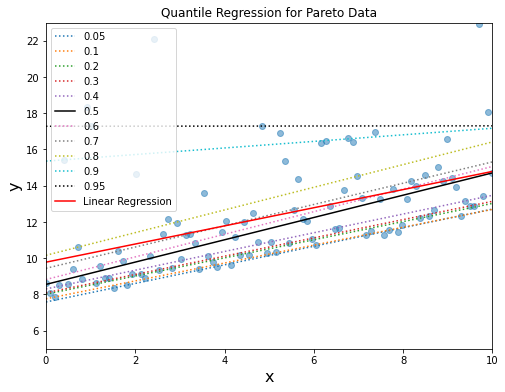

In [70]:
x = np.linspace(start=0, stop=10, num=100)
mae = []
mse = []
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))
col = ['tab:blue', 'tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:grey','tab:olive','tab:cyan','black']

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    mae.append(mean_absolute_error(y,y_pareto))
    mse.append(mean_squared_error(y,y_pareto))
    #ax.plot(x, y, linestyle="dotted", color=col[i], alpha = 1, label = '{quantile}'.format(quantile = round(models['q'][i],2)))
    if models['q'][i] == 0.5:
        ax.plot(x, y, color='black', alpha = 1, label = 0.5)
    else:
        ax.plot(x, y, linestyle="dotted", color=col[i], alpha = 1, label = '{quantile}'.format(quantile = round(models['q'][i],2)))

ax.plot(x, y1_pareto, color="red", label="Linear Regression")
ax.scatter(pareto.x, pareto.y, alpha=0.5)
ax.set_xlim((0, 10))
ax.set_ylim((5, 23))
legend = ax.legend()
ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y", fontsize=16)
ax.set_title("Quantile Regression for Pareto Data")
loss_df_pareto = pd.DataFrame(columns= ('Quantile','MAE','MSE'))
loss_df_pareto['Quantile'] = models['q']
loss_df_pareto['MAE'] = mae
loss_df_pareto['MSE'] =mse

In [71]:
loss_df_pareto

,Quantile,MAE,MSE
0,0.05,2.148932,11.061632
1,0.10,2.080609,10.719347
2,0.20,1.883737,9.603931
3,0.30,1.835647,9.272651
4,0.40,1.745789,8.440961
5,0.50,1.670429,7.024976
6,0.60,1.699223,6.731102
7,0.70,1.824780,6.558235
8,0.80,2.299910,7.625421
9,0.90,4.372168,23.194800


### Online Quantile Regression for Pareto Data

In [72]:
def fit_model_online_pareto(q):
    mod2_pareto = Online_QuantileSGD(wb['w'][0],wb['b'][0], tow = q, alpha = 0.001,learning_rate=0.00008,damp_factor=1)
    weight, bias = mod2_pareto.fit_regression(pareto[:51])
    mod2_online_pareto = Online_QuantileSGD(weight, bias, tow= q,alpha = 0.001,learning_rate = 0.0001, damp_factor = 1)
    w,b = mod2_online_pareto.fit_online(pareto[51:])
    return [q, b[0][0],w[0][0]]
models = [fit_model_online_pareto(x) for x in quantiles]
models = pd.DataFrame(models, columns=["q", "a", "b"])

In [73]:
models

,q,a,b
0,0.05,7.663437,0.470545
1,0.10,7.763165,0.481256
2,0.20,8.172122,0.437114
3,0.30,8.330388,0.412419
4,0.40,8.313761,0.501031
5,0.50,8.429847,0.523745
6,0.60,8.645005,0.701853
7,0.70,9.415659,0.595001
8,0.80,10.293489,0.445332
9,0.90,16.003406,-0.645135


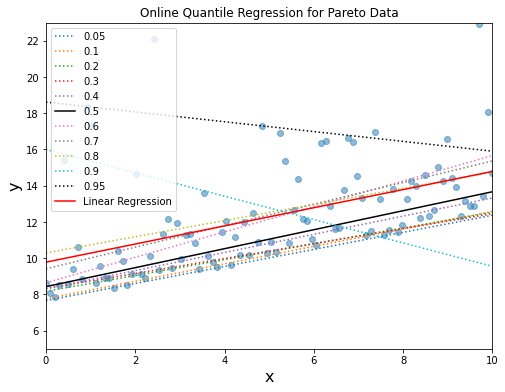

In [74]:
x = np.linspace(start=0, stop=10, num=100)
mae = []
mse = []
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))
col = ['tab:blue', 'tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:grey','tab:olive','tab:cyan','black']

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    mae.append(mean_absolute_error(y,y_pareto))
    mse.append(mean_squared_error(y,y_pareto))
    if models['q'][i] == 0.5:
        ax.plot(x, y, color='black', alpha = 1, label = 0.5)
    else:
        ax.plot(x, y, linestyle="dotted", color=col[i], alpha = 1, label = '{quantile}'.format(quantile = round(models['q'][i],2)))
ax.plot(x, y1_pareto, color="red", label="Linear Regression")
ax.scatter(pareto.x, pareto.y, alpha=0.5)
ax.set_xlim((0, 10))
ax.set_ylim((5, 23))
legend = ax.legend()
ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y", fontsize=16)
ax.set_title("Online Quantile Regression for Pareto Data")
loss_df_online_pareto = pd.DataFrame(columns= ('Quantile','MAE_Online','MSE_Online'))
loss_df_online_pareto['Quantile'] = models['q']
loss_df_online_pareto['MAE_Online'] = mae
loss_df_online_pareto['MSE_Online'] =mse

In [75]:
loss_df_online_pareto

,Quantile,MAE_Online,MSE_Online
0,0.05,2.269338,11.638609
1,0.10,2.130123,10.962229
2,0.20,1.994223,10.232551
3,0.30,1.984006,10.131582
4,0.40,1.765148,8.633620
5,0.50,1.721266,8.017764
6,0.60,1.768124,6.846903
7,0.70,1.830294,6.572863
8,0.80,1.907135,6.567607
9,0.90,3.506923,17.891527


### Quantile Linear Regression for mtcars Data Set

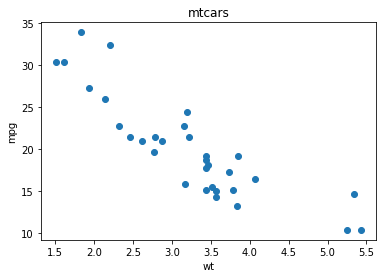

In [76]:
import statsmodels.api as sm
mt = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mt)
y_mtcars = df['mpg'].values.reshape(-1,1)
x = df['wt'].values.reshape(-1,1)
plt.scatter(x,y_mtcars)
plt.xlabel('wt')
plt.ylabel('mpg')
plt.title('mtcars')
plt.show()
mtcars = pd.DataFrame(columns = ('x','y'))
mtcars['x'] = df['wt']
mtcars['y'] = df['mpg']

In [77]:
mod1_mtcars = smf.quantreg('y ~ x',mtcars)
res = mod1_mtcars.fit(q=0.5)
for i in res.params.index:
    print(res.params[i])

34.23224448887345
-4.539475512394702


In [78]:
def fit_model_mtcars(q):
    res = mod1_mtcars.fit(q=q)
    return [q, res.params["Intercept"], res.params["x"]]


models = [fit_model_mtcars(x) for x in quantiles]
models = pd.DataFrame(models, columns=["q", "a", "b"])


models

,q,a,b
0,0.05,37.561538,-6.515837
1,0.10,37.509794,-6.494845
2,0.20,37.276798,-6.239999
3,0.30,34.876712,-5.205479
4,0.40,34.891171,-4.852940
5,0.50,34.232244,-4.539476
6,0.60,36.734407,-5.016078
7,0.70,38.497403,-5.351886
8,0.80,38.879916,-5.250722
9,0.90,44.391048,-6.266786


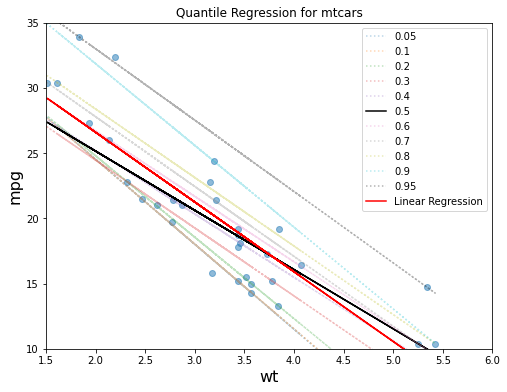

In [79]:
mae = []
mse = []
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))
col = ['tab:blue', 'tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:grey','tab:olive','tab:cyan','black']

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    mae.append(mean_absolute_error(y,y_mtcars))
    mse.append(mean_squared_error(y,y_mtcars))
    if models['q'][i] == 0.5:
        ax.plot(x, y, color='black', alpha = 1, label = 0.5)
    else:
        ax.plot(x, y, linestyle="dotted", color=col[i], alpha = 0.3, label = '{quantile}'.format(quantile = round(models['q'][i],2)))

ax.plot(x, y1_mtcars.reshape(32,1), color="red", label="Linear Regression")
ax.scatter(mtcars.x, mtcars.y, alpha=0.5)
ax.set_xlim((1.5, 6))
ax.set_ylim((10, 35))
legend = ax.legend()
ax.set_xlabel("wt", fontsize=16)
ax.set_ylabel("mpg", fontsize=16)
ax.set_title("Quantile Regression for mtcars")
loss_df_mtcars = pd.DataFrame(columns= ('Quantile','MAE','MSE'))
loss_df_mtcars['Quantile'] = models['q']
loss_df_mtcars['MAE'] = mae
loss_df_mtcars['MSE'] =mse

### Online Quantile Regression for mtcars

In [80]:
def fit_model_online_mtcars(q):
    mod2_mtcars = Online_QuantileSGD(wb['w'][0],wb['b'][0], tow = q, alpha = 0.001,learning_rate=0.00008,damp_factor=1)
    weight, bias = mod2_mtcars.fit_regression(mtcars[:21])
    mod2_online_mtcars = Online_QuantileSGD(weight, bias, tow= q,alpha = 0.001,learning_rate = 0.0001, damp_factor = 1)
    w,b = mod2_online_mtcars.fit_online(mtcars[21:])
    return [q, b[0][0],w[0][0]]
models = [fit_model_online_mtcars(x) for x in quantiles]
models = pd.DataFrame(models, columns=["q", "a", "b"])

In [81]:
models

,q,a,b
0,0.05,37.561489,-6.515990
1,0.10,33.309016,-4.792580
2,0.20,31.559318,-4.031799
3,0.30,32.618159,-4.233136
4,0.40,33.441261,-4.328493
5,0.50,34.474367,-4.586298
6,0.60,38.778028,-5.406320
7,0.70,38.879690,-5.251316
8,0.80,44.390825,-6.267436
9,0.90,43.937500,-5.470412


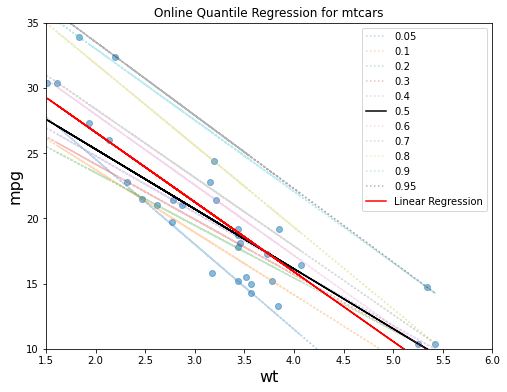

In [82]:
mae = []
mse = []
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))
col = ['tab:blue', 'tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:grey','tab:olive','tab:cyan','black']

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    mae.append(mean_absolute_error(y,y_mtcars))
    mse.append(mean_squared_error(y,y_mtcars))
    if models['q'][i] == 0.5:
        ax.plot(x, y, color='black', alpha = 1, label = 0.5)
    else:
        ax.plot(x, y, linestyle="dotted", color=col[i], alpha = 0.3, label = '{quantile}'.format(quantile = round(models['q'][i],2)))
ax.plot(x, y1_mtcars.reshape(32,1), color="red", label="Linear Regression")
ax.scatter(mtcars.x, mtcars.y, alpha=0.5)
ax.set_xlim((1.5, 6))
ax.set_ylim((10, 35))
legend = ax.legend()
ax.set_xlabel("wt", fontsize=16)
ax.set_ylabel("mpg", fontsize=16)
ax.set_title("Online Quantile Regression for mtcars")
loss_df_online_mtcars = pd.DataFrame(columns= ('Quantile','MAE_Online','MSE_Online'))
loss_df_online_mtcars['Quantile'] = models['q']
loss_df_online_mtcars['MAE_Online'] = mae
loss_df_online_mtcars['MSE_Online'] =mse

In [83]:
loss_df_online_mtcars

,Quantile,MAE_Online,MSE_Online
0,0.05,3.561816,22.169439
1,0.10,2.821803,13.822411
2,0.20,2.571117,12.553519
3,0.30,2.425579,11.034460
4,0.40,2.340055,9.985762
5,0.50,2.321925,9.368721
6,0.60,2.657293,10.375340
7,0.70,2.948550,12.293868
8,0.80,4.550174,26.596540
9,0.90,6.278439,47.739662


### Quantile Regression for Old Faithful Geyser Data Set 

In [97]:
df = pd.read_csv('faithful.csv',index_col=False)
df.drop(['Unnamed: 0'], axis = 1)
x = df['eruptions'].values.reshape(-1,1)
y_faithful = df['waiting'].values.reshape(-1,1)
faithful = pd.DataFrame(columns = ('x','y'))
faithful['x'] = df['eruptions']
faithful['y'] = df['waiting']

In [98]:
mod1_faithful = smf.quantreg('y ~ x',faithful)
res = mod1_faithful.fit(q=0.5)
for i in res.params.index:
    print(res.params[i])

34.72915961162357
10.416668533442703


In [99]:
def fit_model_faithful(q):
    res = mod1_faithful.fit(q=q)
    return [q, res.params["Intercept"], res.params["x"]]


models = [fit_model_faithful(x) for x in quantiles]
models = pd.DataFrame(models, columns=["q", "a", "b"])

models

,q,a,b
0,0.05,24.577418,10.653409
1,0.10,26.906245,10.416669
2,0.20,28.143721,10.697674
3,0.30,29.828331,10.804322
4,0.40,31.547896,10.743062
5,0.50,34.729160,10.416669
6,0.60,34.883717,10.697677
7,0.70,37.094082,10.452959
8,0.80,37.818180,10.909092
9,0.90,39.836324,11.272736


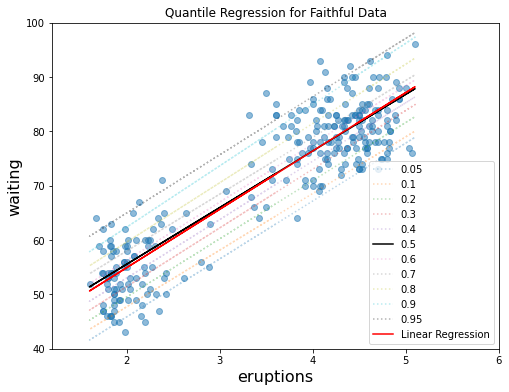

In [100]:
mae = []
mse = []
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))
col = ['tab:blue', 'tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:grey','tab:olive','tab:cyan','black']

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    mae.append(mean_absolute_error(y,y_faithful))
    mse.append(mean_squared_error(y,y_faithful))
    if models['q'][i] == 0.5:
        ax.plot(x, y, color='black', alpha = 1, label = 0.5)
    else:
        ax.plot(x, y, linestyle="dotted", color=col[i], alpha = 0.3, label = '{quantile}'.format(quantile = round(models['q'][i],2)))

ax.plot(x, y1_faithful.reshape(272,1), color="red", label="Linear Regression")
ax.scatter(faithful.x, faithful.y, alpha=0.5)
ax.set_xlim((1.2, 6))
ax.set_ylim((40, 100))
legend = ax.legend()
ax.set_xlabel("eruptions", fontsize=16)
ax.set_ylabel("waiting", fontsize=16)
ax.set_title("Quantile Regression for Faithful Data")
loss_df_faithful = pd.DataFrame(columns= ('Quantile','MAE','MSE'))
loss_df_faithful['Quantile'] = models['q']
loss_df_faithful['MAE'] = mae
loss_df_faithful['MSE'] =mse

In [101]:
loss_df_faithful

,Quantile,MAE,MSE
0,0.05,9.296250,118.683929
1,0.10,8.015430,93.516939
2,0.20,6.453767,64.336876
3,0.30,5.448242,46.187835
4,0.40,5.008874,38.251816
5,0.50,4.768497,34.872099
6,0.60,4.863125,36.404033
7,0.70,5.282830,41.865000
8,0.80,6.450388,59.457720
9,0.90,8.761401,103.264743


### Online Quantile Regression for Old Faithful Geyser Data Set 

In [102]:
def fit_model_online_faithful(q):
    mod2_faithful = Online_QuantileSGD(wb['w'][0],wb['b'][0], tow = q, alpha = 0.001,learning_rate=0.00008,damp_factor=1)
    weight, bias = mod2_faithful.fit_regression(faithful[:101])
    mod2_online_faithful = Online_QuantileSGD(weight, bias, tow= q,alpha = 0.001,learning_rate = 0.0001, damp_factor = 1)
    w,b = mod2_online_faithful.fit_online(faithful[101:])
    return [q, b[0][0],w[0][0]]
models = [fit_model_online_faithful(x) for x in quantiles]
models = pd.DataFrame(models, columns=["q", "a", "b"])

In [103]:
models

,q,a,b
0,0.05,31.523487,8.823535
1,0.10,30.020932,9.700250
2,0.20,31.853563,9.816833
3,0.30,33.435492,9.758823
4,0.40,36.890907,9.441688
5,0.50,37.140207,9.729967
6,0.60,41.128161,8.941265
7,0.70,40.839812,9.499671
8,0.80,42.352789,9.712393
9,0.90,45.833975,9.368102


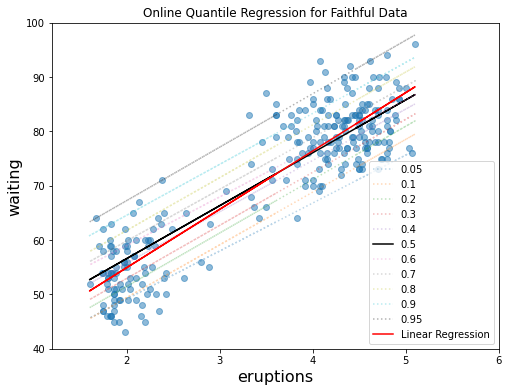

In [104]:
mae = []
mse = []
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))
col = ['tab:blue', 'tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:grey','tab:olive','tab:cyan','black']

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    mae.append(mean_absolute_error(y,y_faithful))
    mse.append(mean_squared_error(y,y_faithful))
    if models['q'][i] == 0.5:
        ax.plot(x, y, color='black', alpha = 1, label = 0.5)
    else:
        ax.plot(x, y, linestyle="dotted", color=col[i], alpha = 0.3, label = '{quantile}'.format(quantile = round(models['q'][i],2)))

ax.plot(x, y1_faithful.reshape(272,1), color="red", label="Linear Regression")
ax.scatter(faithful.x, faithful.y, alpha=0.5)
ax.set_xlim((1.2, 6))
ax.set_ylim((40, 100))
legend = ax.legend()
ax.set_xlabel("eruptions", fontsize=16)
ax.set_ylabel("waiting", fontsize=16)
ax.set_title("Online Quantile Regression for Faithful Data")
loss_df_online_faithful = pd.DataFrame(columns= ('Quantile','MAE_Online','MSE_Online'))
loss_df_online_faithful['Quantile'] = models['q']
loss_df_online_faithful['MAE_Online'] = mae
loss_df_online_faithful['MSE_Online'] =mse

In [105]:
loss_df_online_faithful

,Quantile,MAE_Online,MSE_Online
0,0.05,8.974184,113.376768
1,0.10,7.602203,85.708227
2,0.20,6.176390,58.883129
3,0.30,5.557794,47.671632
4,0.40,4.959638,38.028281
5,0.50,4.850150,36.047527
6,0.60,5.155619,40.875411
7,0.70,5.518918,46.140864
8,0.80,6.735531,64.475118
9,0.90,8.337043,95.049093


#### When x = 5 then what is the value of y for each quantile?

In [106]:
x = 5
y_hat = []
for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    y_hat.append(y)

In [107]:
df_five = pd.DataFrame({'Quantiles':quantiles,'y_hat':y_hat})
df_five

,Quantiles,y_hat
0,0.05,75.641163
1,0.10,78.522182
2,0.20,80.937729
3,0.30,82.229606
4,0.40,84.099349
5,0.50,85.790044
6,0.60,85.834486
7,0.70,88.338166
8,0.80,90.914752
9,0.90,92.674486
